In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

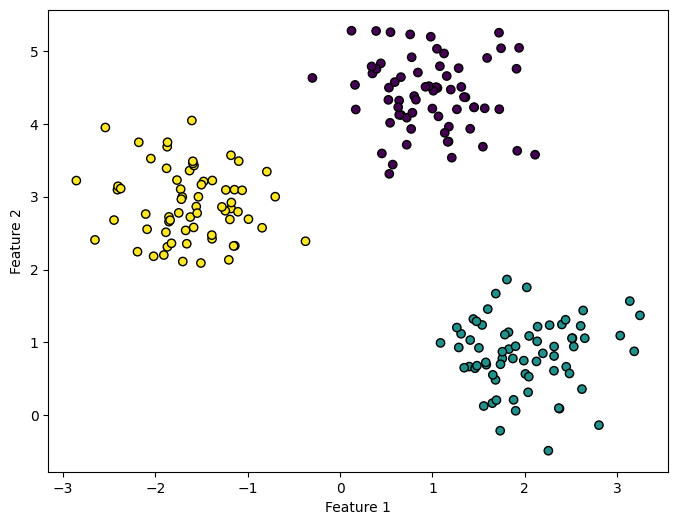

In [19]:
n_samples = 200
n_clusters = 3

x, y = make_blobs(n_samples=n_samples, centers=n_clusters,
                  cluster_std=0.5, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [23]:
df = pd.read_csv('./dataset/technical_support.csv')
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [24]:
df.shape

(23, 8)

In [25]:
attr = df.iloc[:, 1:]
attr.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,170,1.3,32,0.04,0.0,75,25
1,12,2.0,150,0.01,0.5,5,95
2,5,1.0,35,0.02,0.2,90,10
3,3,2.0,8,0.01,0.7,5,95
4,45,2.3,54,0.15,0.0,99,1


In [26]:
attr_scaled = attr.apply(zscore)
attr_scaled.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074


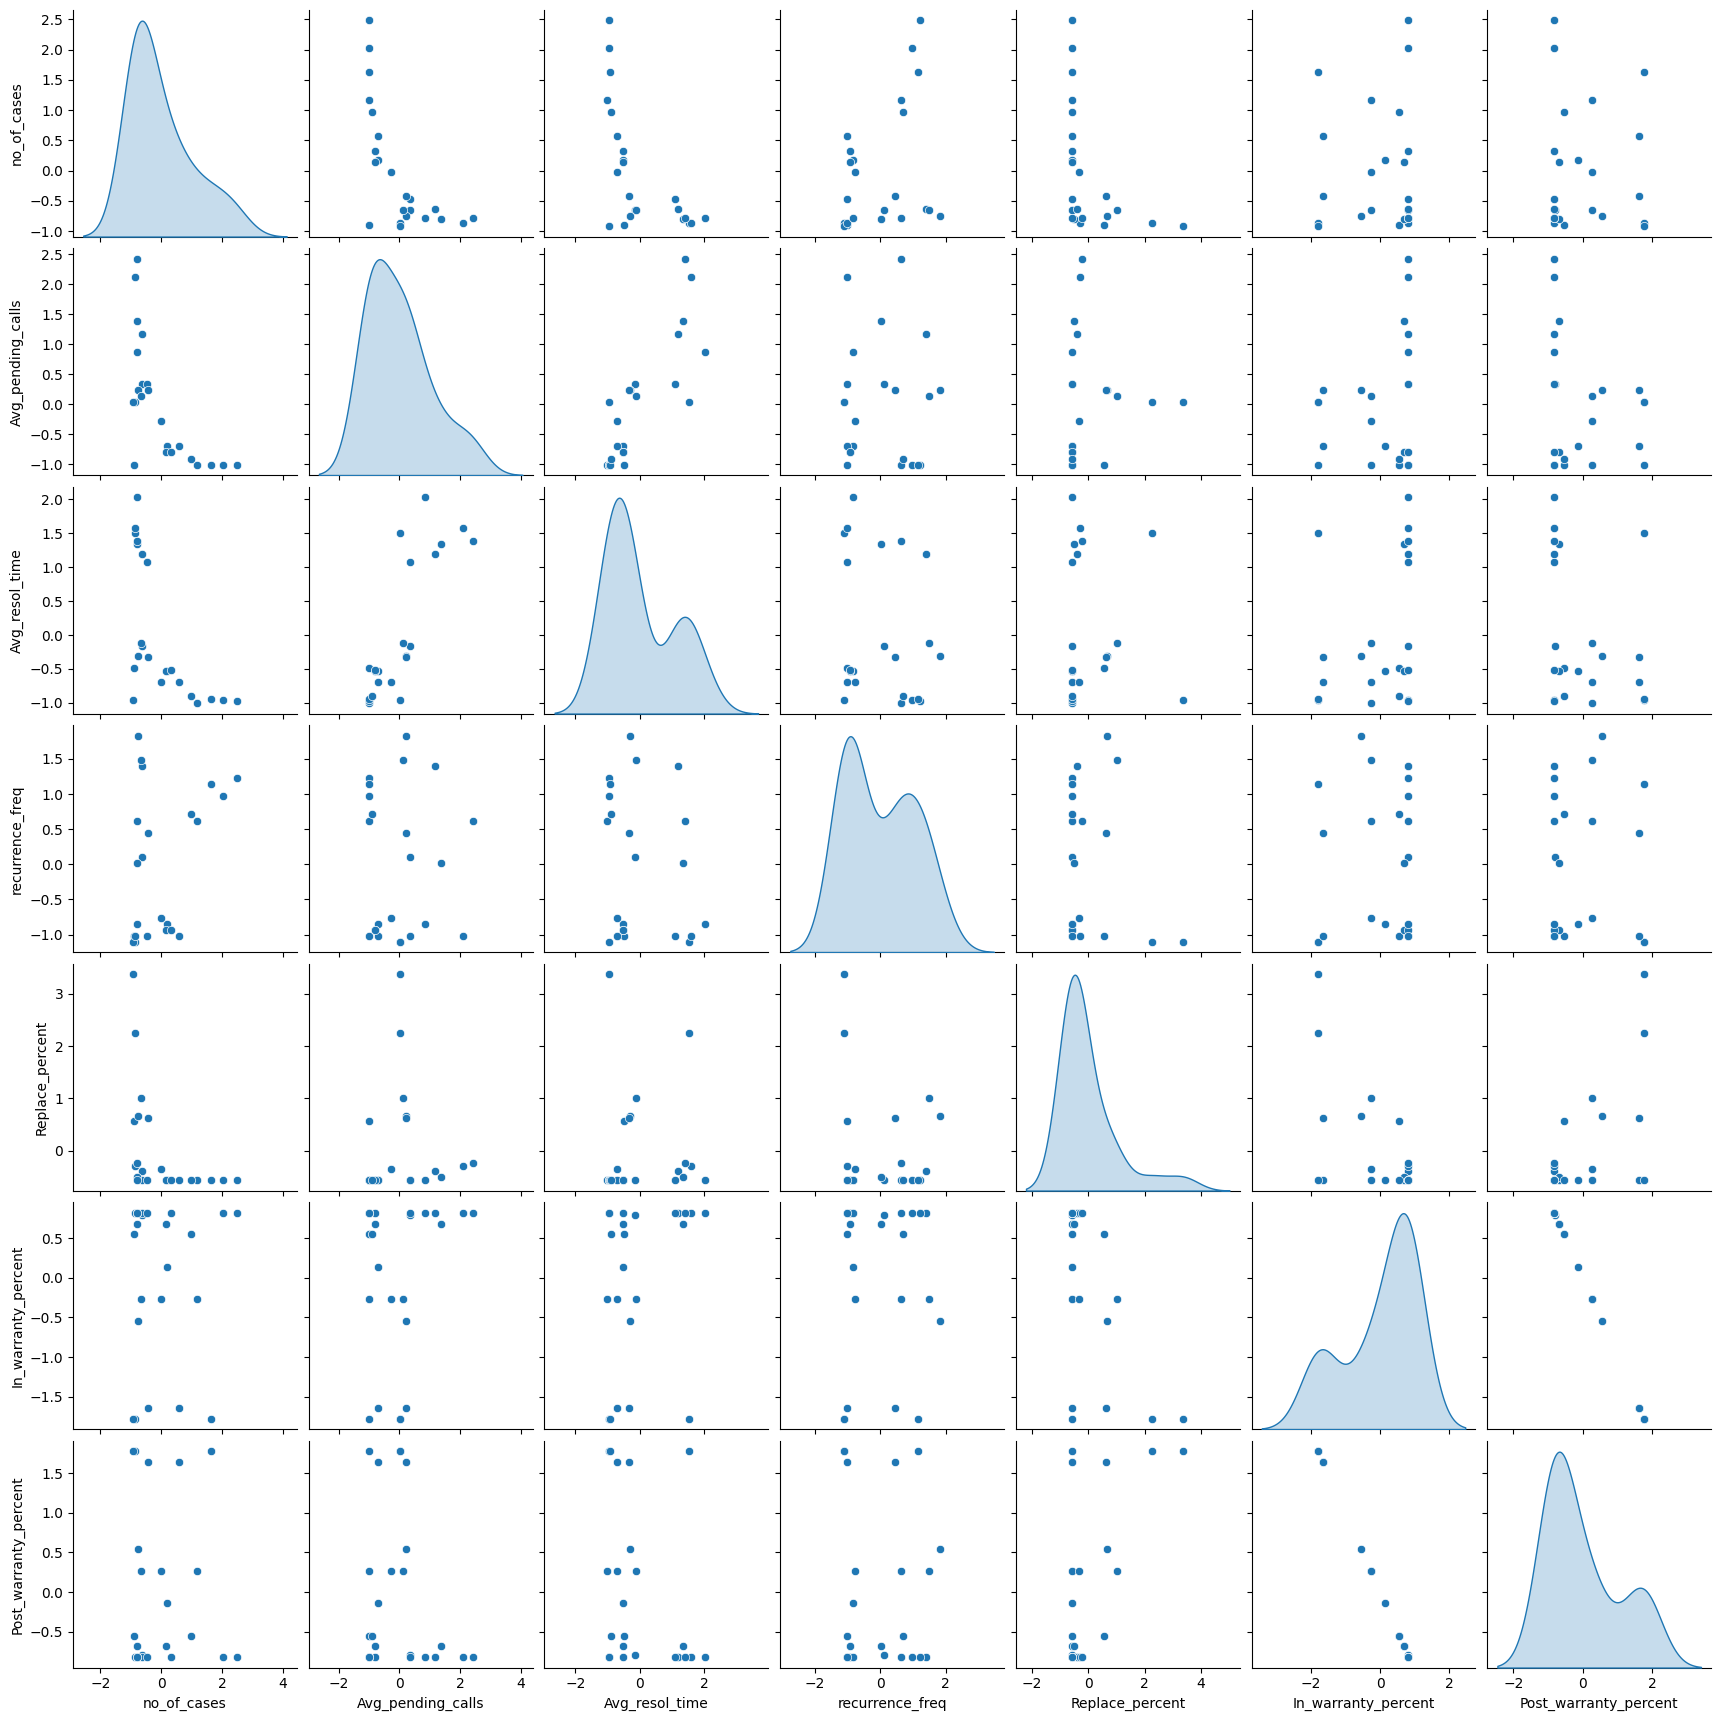

In [27]:
sns.pairplot(attr_scaled, diag_kind='kde')
plt.show()

In [52]:
from scipy.spatial.distance import cdist
clusters = range(1, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)

    model.fit(attr_scaled)
    prediction = model.predict(attr_scaled)

    meanDistortions.append(
        sum(
            np.min(
                cdist(attr_scaled,
                      model.cluster_centers_,
                     'euclidean'), axis=1
            )
        ) / attr_scaled.shape[0]
    )

In [53]:
meanDistortions

[2.5132186215720433,
 2.011069807948648,
 1.633958126099869,
 1.5907776235971847,
 1.2551905609021734,
 1.0816442294937267,
 0.9761257680056512,
 0.8758401479633078,
 0.7881420217603765,
 0.6863167261422818]

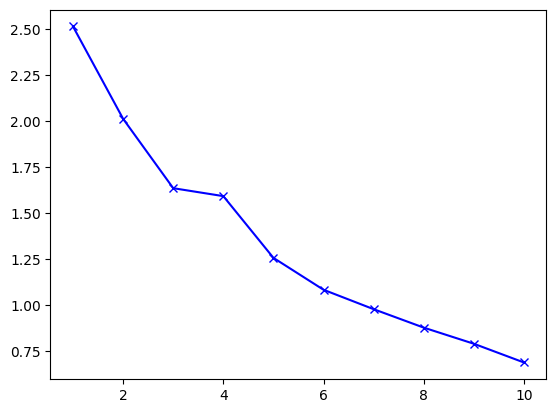

In [54]:
plt.plot(clusters, meanDistortions, 'bx-')

plt.show()

In [55]:
final_model = KMeans(3)
final_model.fit(attr_scaled)
prediction = final_model.predict(attr_scaled)

In [56]:
df['Clusters'] = prediction
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,2
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,1


In [57]:
df['Clusters'].value_counts()

Clusters
0    12
1     7
2     4
Name: count, dtype: int64

In [58]:
df[df['Clusters'] == 0]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,0
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,0
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,0
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40,0
12,AC controller sofware missing,193,1.2,33,0.03,0.00,100,0,0
14,Remote Keys get stuck,450,1.0,8,0.25,0.00,100,0,0
15,Unable to operate menu from remote,520,1.0,7,0.28,0.00,100,0,0
16,Motor noise from the system,390,1.0,9,0.27,0.00,5,95,0
17,Freshner holder stuck,140,1.7,23,0.05,0.04,60,40,0
19,WIFI connectivity breaks,290,1.1,11,0.22,0.00,90,10,0


In [59]:
df[df['Clusters'] == 1]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,1
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,1
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,1
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,1
10,Mobile screen blanks on use of phone,23,4.3,143,0.21,0.06,100,0,1
13,AC remote does not work,24,2.8,180,0.04,0.00,100,0,1
18,Factory settings not working,72,2.3,125,0.02,0.00,100,0,1


In [60]:
df[df['Clusters'] == 2]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95,2
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95,2
11,Cluttered with popup messages,230,1.3,23,0.02,0.00,10,90,2
22,Fan speed varies at on its own,78,2.2,44,0.19,0.21,10,90,2
